In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib widget
from common_import import *

### Load data_type

In [3]:
data_type_list = ['cam_3d']
overwrite_list = ['cam_3d']
dataset_name = '3dhp'
data_aug = default_data_aug.copy()
data = load_data_dict(dataset_name, data_type_list, overwrite_list, verbose=True, data_aug=data_aug)

[overwrite: True] ==> Loading 3DHP cam_3d...


  0%|          | 0/8 [00:00<?, ?it/s]

100%|██████████| 230/230 [00:06<00:00, 34.72it/s]


In [ ]:
data_type_list = ['source_list', 'cam_param', 'cam_param_adaptive_focal',
                  'cam_3d', 'img_2d', 'world_3d',
                  'img_3d', 'scale_factor', 'img_25d',
                  'cam_3d_canonical_same_z', 'img_2d_canonical_same_z',
                  'cam_3d_canonical_same_dist', 'img_2d_canonical_same_dist',
                  'cam_3d_canonical_fixed_dist_5', 'img_2d_canonical_fixed_dist_5', 'img_2d_canonical_fixed_dist_5_adaptive_focal'
                  ]
overwrite_list = []
dataset_name = 'h36m'
data_aug = default_data_aug.copy()
data = load_data_dict(dataset_name, data_type_list, overwrite_list, verbose=True, data_aug=data_aug)

[overwrite: False] ==> Loading H36M source_list...
[overwrite: False] ==> Loading H36M cam_param...
[overwrite: False] ==> Loading H36M cam_param-adaptive_focal...
[overwrite: False] ==> Loading H36M cam_3d...


[overwrite: False] ==> Loading H36M img_2d...
[overwrite: False] ==> Loading H36M world_3d...
[overwrite: False] ==> Loading H36M img_3d...
[overwrite: False] ==> Loading H36M scale_factor...
[overwrite: False] ==> Loading H36M img_25d...
[overwrite: False] ==> Loading H36M cam_3d_canonical_same_z...
[overwrite: False] ==> Loading H36M img_2d_canonical_same_z...
[overwrite: False] ==> Loading H36M cam_3d_canonical_same_dist...
[overwrite: False] ==> Loading H36M img_2d_canonical_same_dist...
[overwrite: False] ==> Loading H36M cam_3d_canonical_fixed_dist_5...
[overwrite: False] ==> Loading H36M img_2d_canonical_fixed_dist_5...
[overwrite: False] ==> Loading H36M img_2d_canonical_fixed_dist_5-adaptive_focal...


In [3]:
# with steprot
overwrite_list = [] # ['cam_3d', 'img_2d', 'cam_3d_canonical_same_z', 'img_2d_canonical_same_z']
data.update(load_data_dict(dataset_name, ['cam_3d', 'img_2d', 'cam_3d_canonical_same_z', 'img_2d_canonical_same_z'], overwrite_list, verbose=True, 
                           data_aug={'step_rot': 0, 
                                    'sinu_yaw_mag': 0, 'sinu_yaw_period': 273, 'sinu_pitch_mag': 0, 'sinu_pitch_period': 273, 
                                    'sinu_roll_mag': 0, 'sinu_roll_period': 273,'rand_yaw_mag': 0, 'rand_yaw_period': 0,
                                    'rand_pitch_mag': 0, 'rand_pitch_period': 0,'rand_roll_mag': 0, 'rand_roll_period': 0
                                    }))

[overwrite: False] ==> Loading H36M cam_3d...
[overwrite: False] ==> Loading H36M img_2d...
[overwrite: False] ==> Loading H36M cam_3d_canonical_same_z...
[overwrite: False] ==> Loading H36M img_2d_canonical_same_z...


In [5]:
print(*data.keys(), sep='\n')

source_list-rand_yaw_m45_p100rand_pitch_m45_p100rand_roll_m30_p100
cam_param-rand_yaw_m45_p100rand_pitch_m45_p100rand_roll_m30_p100
cam_param_adaptive_focal-rand_yaw_m45_p100rand_pitch_m45_p100rand_roll_m30_p100
cam_3d-rand_yaw_m45_p100rand_pitch_m45_p100rand_roll_m30_p100
img_2d-rand_yaw_m45_p100rand_pitch_m45_p100rand_roll_m30_p100
world_3d-rand_yaw_m45_p100rand_pitch_m45_p100rand_roll_m30_p100
img_3d-rand_yaw_m45_p100rand_pitch_m45_p100rand_roll_m30_p100
scale_factor-rand_yaw_m45_p100rand_pitch_m45_p100rand_roll_m30_p100
img_25d-rand_yaw_m45_p100rand_pitch_m45_p100rand_roll_m30_p100
cam_3d_canonical_same_z-rand_yaw_m45_p100rand_pitch_m45_p100rand_roll_m30_p100
img_2d_canonical_same_z-rand_yaw_m45_p100rand_pitch_m45_p100rand_roll_m30_p100
cam_3d_canonical_same_dist-rand_yaw_m45_p100rand_pitch_m45_p100rand_roll_m30_p100
img_2d_canonical_same_dist-rand_yaw_m45_p100rand_pitch_m45_p100rand_roll_m30_p100
cam_3d_canonical_fixed_dist_5-rand_yaw_m45_p100rand_pitch_m45_p100rand_roll_m30_p100


In [36]:
# check constraints
for source in data['source_list']:
    subject, cam_id, action = split_source_name(source, dataset_name)
    world_3d = data['world_3d'][subject][action]
    cam_3d = data['cam_3d'][subject][action][cam_id]
    img_2d = data['img_2d'][subject][action][cam_id]
    img_3d = data['img_3d'][subject][action][cam_id]
    cam_3d_canonical_same_z = data['cam_3d_canonical_same_z'][subject][action][cam_id]
    cam_3d_canonical_same_dist = data['cam_3d_canonical_same_dist'][subject][action][cam_id]
    cam_3d_canonical_fixed_dist_5 = data['cam_3d_canonical_fixed_dist_5'][subject][action][cam_id]
    assert world_3d.shape[1:] == (17, 3), f"{source} {data['world_3d'][subject][action].shape}"
    assert world_3d.mean() < 5, f'{source} {world_3d.mean()}'
    assert cam_3d.shape[1:] == (17, 3), f'{source} {cam_3d.shape}'
    assert cam_3d.mean() < 5, f'{source} {cam_3d.mean()}'
    assert img_2d.mean() > 1, f'{source} {img_2d.mean()}'
    assert np.allclose(img_2d, img_3d[...,:2]), f'image 2d and 3d are not equal'
    assert np.allclose(cam_3d[...,2], cam_3d_canonical_same_z[...,2]), 'Z values should be same'
    assert np.allclose(np.linalg.norm(cam_3d[:, 0], axis=1), cam_3d_canonical_same_dist[:, 0, 2]), 'Distances should be same'
    assert np.allclose(np.array([5.0]*len(cam_3d)), cam_3d_canonical_fixed_dist_5[:, 0, 2]), 'Distances should be same'

In [ ]:
source_list = readpkl('data/motion3d/3dhp/3dhp-source_list.pkl')

In [27]:
comp1 = readpkl('data/motion3d/3dhp/3dhp-img_2d-canonical_same_z-steprot_1.0.pkl')
comp2 = readpkl('data/motion3d/3dhp/3dhp_img_2d_canonical_same_z_steprot_1.0.pkl')

In [28]:
for source in source_list:
    subject, cam_id, action = split_source_name(source, dataset_name)
    assert np.allclose(comp1[subject][action][cam_id], comp2[subject][action][cam_id]), f'{source}'

In [17]:
test = Rotation.from_euler('x', np.deg2rad(5)*np.sin(np.arange(0, 1400)/273*2*np.pi)).as_matrix()
test

array([[[ 1.        ,  0.        ,  0.        ],
        [ 0.        ,  1.        ,  0.        ],
        [ 0.        ,  0.        ,  1.        ]],

       [[ 1.        ,  0.        ,  0.        ],
        [ 0.        ,  0.99338715, -0.11481274],
        [ 0.        ,  0.11481274,  0.99338715]],

       [[ 1.        ,  0.        ,  0.        ],
        [ 0.        ,  0.97364997, -0.22804767],
        [ 0.        ,  0.22804767,  0.97364997]],

       ...,

       [[ 1.        ,  0.        ,  0.        ],
        [ 0.        , -0.97657611,  0.21517225],
        [ 0.        , -0.21517225, -0.97657611]],

       [[ 1.        ,  0.        ,  0.        ],
        [ 0.        , -0.9549742 ,  0.29668884],
        [ 0.        , -0.29668884, -0.9549742 ]],

       [[ 1.        ,  0.        ,  0.        ],
        [ 0.        , -0.92726521,  0.37440517],
        [ 0.        , -0.37440517, -0.92726521]]])

### Random

In [ ]:
#random.seed(0)
for i in range(10):
    print(random.randrange(-100, 100))

-77
52
-2
-19
47
-39
-26
-53
-52
-53


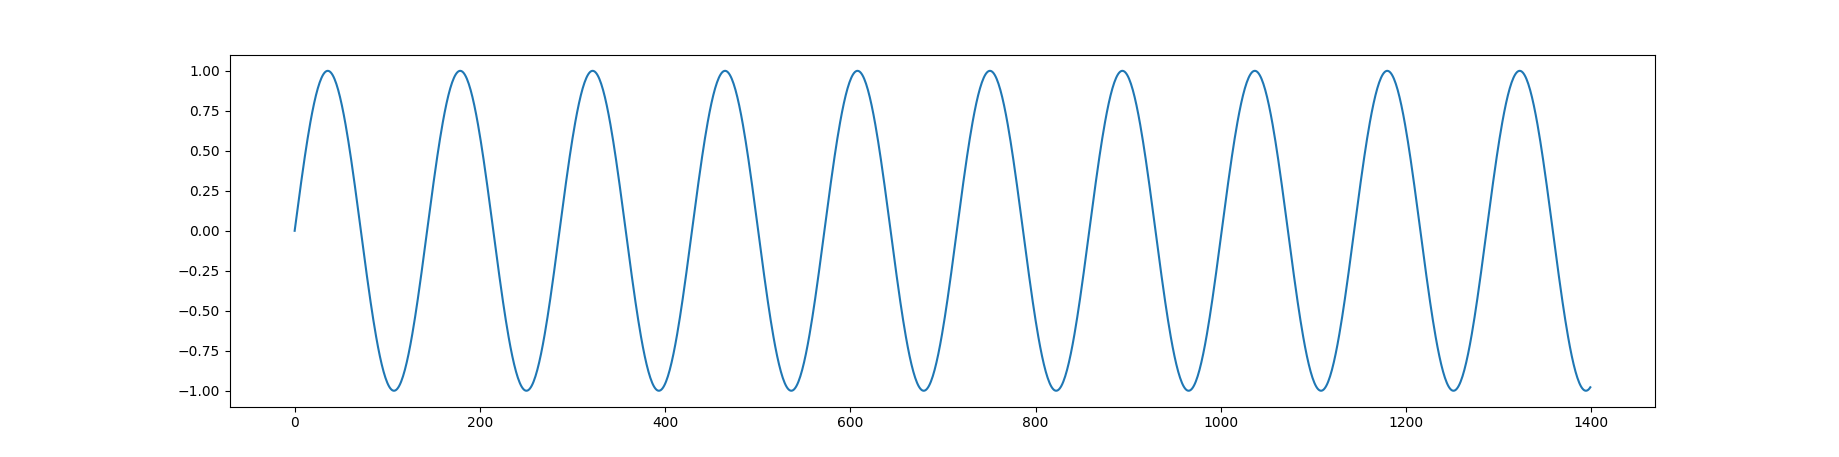

In [ ]:
plt.clf()
x = np.arange(0, 1400)
period = 243 - 100
phase = 0
y = np.sin((x+phase)/period*np.pi*2)
plt.plot(x, y)
plt.show()

### Num data

In [ ]:
subject_num_data = {}
for subject in data['cam_3d'].keys():
    num_data = 0
    for action in data['cam_3d'][subject].keys():
        for cam_id in data['cam_3d'][subject][action].keys():
            #print(subject, action, cam_id, data['cam_3d'][subject][action][cam_id].shape)
            num_data += data['cam_3d'][subject][action][cam_id].shape[0]
    print(subject, num_data)
    subject_num_data[subject] = num_data

np.array([subject_num_data[subject] for subject in ['S1', 'S5', 'S6', 'S7', 'S8']]).sum()

### 3DHP with universal skeleton

In [5]:
data_type_list = ['source_list', 'cam_param',
                  'cam_3d', 'img_2d',
                  'cam_3d_canonical_same_z', 'img_2d_canonical_same_z',
                  ]
overwrite_list = []
dataset_name = '3dhp'
data_aug = default_data_aug.copy()
data = load_data_dict(dataset_name, data_type_list, overwrite_list, verbose=True, data_aug=data_aug, univ=True)

[overwrite: False] ==> Loading 3DHP source_list...
[overwrite: False] ==> Loading 3DHP cam_param...
[overwrite: False] ==> Loading 3DHP cam_3d...


  0%|          | 0/8 [00:00<?, ?it/s]

100%|██████████| 230/230 [00:06<00:00, 34.07it/s]


[overwrite: False] ==> Loading 3DHP img_2d...
[overwrite: False] ==> Loading 3DHP cam_3d_canonical_same_z...


100%|██████████| 230/230 [00:00<00:00, 597.56it/s]


[overwrite: False] ==> Loading 3DHP img_2d_canonical_same_z...
